This notebook is made for "Data Analysis for Genomics Workshop" (DAGWS). 
Tran Bich Ngoc CAO, ENS Paris, August 2020.
<a rel="license" href="https://creativecommons.org/licenses/by/2.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br /> This work is protected by the term of <a rel="license" href="https://creativecommons.org/licenses/by/2.0/"> Attribution 2.0 Generic (CC BY 2.0) </a>. Please cite the source in case of re-distribution.

# Problem set 1

__Introduction__

In this session, we are going to work on several independent datasets.

`cytokines` contains the abundance levels of 23 cytokines for 25 mices (9 K0 and 16 WT).

`virulence` contains binary measurements of presence/absence of 5 virulence biomarkers in 1222 bacterial strains.

`weight` contains the weight measurements of 8 mice at 2 different timepoints.

`red_cells` contains the number of cells marked by a red color within 2 conditions (treated or not treated cells).

`infected_cells` contains the number of infected cells as well as the total number of cells for each biological replicates. The goal is to study the proportion of infected cells between 2 mouse strains.

`MFI_controller` contains measures of 89 markers (measured through Mean Fluorescent Intensity) for two types of patients.

All datasets used in this session are real data generated during biological experiments.

In [1]:
#Read table datasets

In [2]:
# import Pandas

In [3]:
import pandas as pd

In [4]:
cytokines = pd.read_csv("data/cytokines.csv",delimiter=" ")

FileNotFoundError: [Errno 2] No such file or directory: 'data/cytokines.csv'

In [ ]:
MFI_controller = pd.read_csv("data/MFI_controller.csv",delimiter=" ")

In [ ]:
infected_cells = pd.read_csv("data/infected_cells.csv",delimiter=";")

In [ ]:
red_cells = pd.read_csv("data/red_cells.csv",delimiter=";")

In [ ]:
virulence = pd.read_csv("data/virulence.csv",delimiter=" ")

In [ ]:
weight = pd.read_csv("data/weight.csv",delimiter=";")

In [ ]:
weight.head()

In [ ]:
cytokines.head()

In [ ]:
MFI_controller.head()

In [5]:
infected_cells.head()

NameError: name 'infected_cells' is not defined

In [6]:
red_cells.head()

NameError: name 'red_cells' is not defined

In [7]:
virulence.head()

NameError: name 'virulence' is not defined

### Estimation

The goal of this section is to play with basic estimators by describing and summarizing: 
 
 1. the abundance level of cytokine `IL-13.(37)` in `cytokines` dataset
 2. the status of the `Toxin` marker in `virulence` dataset

1. Make a simple representation of the 2 variables of interest.

(Homework) 2. Pick estimators that are adequate to each marker within the following list and associate the correct word to its maths definition, Python function/script and data. Specify for each estimator if it is a **position**, **scale** or **shape** parameter.

**1. Non exhaustive list of basic estimators**

* Mean
* Median
* Mode
* Maximum and minimum
* Quantile (of order q)
* Variance
* Standard deviation
* Standard Error to the Mean (SEM)
* Absolute deviation to the mean or median
* Skewness
* Coefficient of variation 
* Frequency or proportion

**2. Python functions:**
Using numpy as np and scipy.stats as stats:
    np.mean()
    np.median()
    np.max()
    np.min()
    stats.mode()
    np.quantile()
    stats.sem()
    
    
    
    

**3. Math definition, if $x=(x_1,\ldots,x_n)$ describes a serie of $n$ observations**

Homework: These definitions are not in the order of section 1, could you classify which math definition corresponds to which estimator? 

* $m = \frac{1}{n}\sum_{i=1}^n x_i$
* $s^2 = \frac{1}{n - 1}\sum_{i=1}^n (x_i - m)^2$
* $f_i = \frac{n_i}{n}$ for each level $i$ of a factor
* $x_{(\frac{n+1}{2})}$ if $n$ is odd, $\frac{1}{2}(x_{(\frac{n}{2})}+x_{(\frac{n}{2}+1)})$ if $n$ is even
* $x_{(1)}$ and $x_{(n)}$
* Most frequent value in the serie
* $s = \sqrt{s^2}$
* $C = \frac{s}{m}$
* $\nu = \frac{s}{\sqrt{n}}$
* $Q$ such that $q\%$ of the observed values are lower than $Q$ and $(1 - q)\%$ are greater than $Q$
* $\text{max}(x)$ and $\text{min}(x)$
* $\text{MAD} =\text{median} (| x_1 - m|,\ldots, | x_n - m|)$


</div>
</div>

We first investigate the `cytokines` dataset. Let's see its column names: (this is the example of a very good biologist but bad bioinformatician ^^ given column names so complicated and confused!)

In [18]:
cytokines.columns

Index(['KC.(57)', 'IFN-g.(34)', 'IL-1a.(53)', 'IL-5.(52)', 'IL-2.(36)',
       'IL-12(p40).(76)', 'MIP-1a.(77)', 'G-CSF.(54)', 'RANTES.(55)',
       'IL-4.(39)', 'GM-CSF.(73)', 'Eotaxin.(74)', 'MIP-1b.(75)', 'IL-10.(56)',
       'MCP-1.(51)', 'IL-13.(37)', 'IL-3.(18)', 'IL-1b.(19)', 'IL-6.(38)',
       'IL-9.(33)', 'IL-12(p70).(78)', 'TNF-a.(21)', 'IL-17.(72)', 'group'],
      dtype='object')

In [19]:
# 1. the abundance level of cytokine `IL-13.(37)` in `cytokines` dataset
###Mean, mode, median is estimator for position

In [20]:
cytokines.head()

,KC.(57),IFN-g.(34),IL-1a.(53),IL-5.(52),IL-2.(36),IL-12(p40).(76),MIP-1a.(77),G-CSF.(54),RANTES.(55),IL-4.(39),...,MCP-1.(51),IL-13.(37),IL-3.(18),IL-1b.(19),IL-6.(38),IL-9.(33),IL-12(p70).(78),TNF-a.(21),IL-17.(72),group
1,2089.595283,26.177370,32.955689,5.010700,8.707965,48.153949,10.899243,299.609045,48.385975,233.072505,...,2158.183268,79.411559,20.517411,1005.635862,7259.398822,1080.489526,33.500066,320.373628,143.306310,WT
2,277.429012,39.738696,42.077106,11.069649,22.199911,64.345464,37.332019,374.407142,92.406246,199.246664,...,6204.046255,676.723824,31.637650,91.730542,2883.469875,495.948263,41.412214,2913.180496,317.522822,WT
3,564.742335,25.724090,36.109372,4.769968,7.148515,48.009724,8.607357,284.444044,50.977107,436.180655,...,1371.583210,66.402958,18.452807,61.012296,872.537812,460.866860,26.728753,939.685270,154.872485,WT
4,2279.712929,21.289159,40.679484,4.562754,6.800197,45.059244,9.039052,276.448842,42.941661,251.888923,...,2955.494978,185.491377,17.716867,208.796817,1755.919481,961.905383,24.053547,340.043269,144.745253,WT
5,720.045912,22.121977,31.921328,3.396210,5.382424,43.218618,6.526006,255.167216,34.298841,516.802455,...,1111.185430,43.477620,13.468498,128.568922,664.140699,597.296044,18.951549,1027.213533,132.237997,WT


In [21]:
# To select one column, use the .loc method of the Pandas Dataframe

In [22]:
cytokines.loc[:,"IL-13.(37)"]


1      79.411559
2     676.723824
3      66.402958
4     185.491377
5      43.477620
6      97.567536
7     122.332452
8     150.149834
9     158.114915
10    304.735858
11    205.126494
12    186.209971
13    127.227422
14    157.247706
15    155.147969
16    142.581040
17    206.711992
18    194.081040
19    198.612412
20    118.802384
21    161.154863
22    128.975323
23    444.833913
24    219.707599
25     34.495413
Name: IL-13.(37), dtype: float64

In [23]:
# Import Numpy to calculate mean, median

In [24]:
import numpy as np

In [25]:
mean = np.mean(cytokines.loc[:,"IL-13.(37)"])
print(mean)

182.61293897667315


In [26]:
np.median(cytokines.loc[:,"IL-13.(37)"])

157.24770642201798

In [28]:
print("Mode of IL-13..37 is: {}".format(np.mode(cytokines.loc[:,"IL-13.(37)"])))

AttributeError: module 'numpy' has no attribute 'mode'

In [29]:
# Mode is not in Numpy! It is in Scipy package actually ! https://kite.com/python/docs/scipy.stats.mode 

In [30]:
import scipy.stats as stats

In [31]:
print("Mode of IL-13.(37) is: {}".format(stats.mode(cytokines.loc[:,"IL-13.(37)"])[0]))

Mode of IL-13.(37) is: [34.49541284]


In [32]:
# Why [0]? Because ... it's a special object called "ModeResult"

In [33]:
stats.mode(cytokines.loc[:,"IL-13.(37)"])

ModeResult(mode=array([34.49541284]), count=array([1]))

In [34]:
# Quicker way for all columns:
cytokines.describe()

,KC.(57),IFN-g.(34),IL-1a.(53),IL-5.(52),IL-2.(36),IL-12(p40).(76),MIP-1a.(77),G-CSF.(54),RANTES.(55),IL-4.(39),...,IL-10.(56),MCP-1.(51),IL-13.(37),IL-3.(18),IL-1b.(19),IL-6.(38),IL-9.(33),IL-12(p70).(78),TNF-a.(21),IL-17.(72)
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1994.064921,56.386873,40.229664,13.530109,18.449762,51.908436,67.978169,328.908774,102.155225,438.386191,...,829.236213,9475.022923,182.612939,55.032853,688.992899,3979.915624,1066.231277,69.171758,1664.579279,218.465178
std,1696.498299,35.168785,20.457948,9.269688,10.233287,19.528914,211.338363,174.573473,52.861494,489.779324,...,3512.382767,20159.382162,132.624473,79.383529,950.644260,5802.126014,1534.362578,47.739970,1724.074084,109.232341
min,148.571429,10.078317,4.904900,2.416648,4.707988,6.981428,5.388230,41.011412,23.826359,76.151264,...,31.004699,189.787424,34.495413,8.914746,39.239203,200.098456,57.820542,12.315954,117.270083,20.997986
25%,636.959511,34.709778,31.559593,7.540239,11.000803,41.779484,14.905068,255.167216,59.845095,185.256160,...,81.080581,1111.185430,122.332452,27.865081,84.860243,791.567085,374.994110,35.502658,634.070336,143.306310
50%,1575.918367,49.801063,36.109372,11.614828,18.288954,48.153949,23.832326,299.609045,108.291132,262.246248,...,111.314114,2695.023794,157.247706,38.577296,264.237488,1627.958833,594.679645,55.449316,883.826082,202.438076
75%,2409.771212,66.451588,47.033450,16.502442,22.542673,64.345464,34.260846,374.407142,125.498085,436.180655,...,165.323778,6204.046255,198.612412,46.434774,811.752303,2883.469875,1080.489526,90.905945,2212.801708,289.731348
max,6500.702381,159.894802,103.197425,40.058899,54.537902,85.789564,1078.967081,1014.068924,282.717777,2234.948268,...,17684.696662,89338.874755,676.723824,415.533488,3218.553504,23068.920619,6780.912765,192.887835,6190.818949,500.154165


In [35]:
# We know that virulence contains binary data (0 and 1):

In [36]:
virulence.Toxin.value_counts()

1    723
0    499
Name: Toxin, dtype: int64

In [37]:
# Proportion of presence:
virulence.Toxin.value_counts()/len(virulence.Toxin)

1    0.591653
0    0.408347
Name: Toxin, dtype: float64

In [38]:
#Mode for toxin is 1
print("Mode of toxin is: {}".format(stats.mode(virulence.Toxin)[0]))
#For virulence data don't need to compute max, min cause it's binary!

Mode of toxin is: [1]


In [39]:
# Quantile

In [40]:
np.quantile(cytokines.loc[:,"IL-13.(37)"],[0.25,0.5,0.95])

array([122.33245218, 157.24770642, 416.81430227])

In [41]:
# Standard error to the mean: Precision of the mean estimation SEM
stats.sem(cytokines.loc[:,"IL-13.(37)"])

26.524894626328877

In [42]:
### Describe dispersion of the data
variance = np.var(cytokines.loc[:,"IL-13.(37)"])

In [43]:
print("Variance of IL-13.(37):",variance)

Variance of IL-13.(37): 16885.68083850841


In [44]:
std = np.std(cytokines.loc[:,"IL-13.(37)"])

In [45]:
print("Standard deviation of IL-13.(37):",std)

Standard deviation of IL-13.(37): 129.94491463119445


Very randomly, `mad` median of absolute deviation is not in Numpy and Stats! We can call the method directly from pandas.Series

In [46]:
# Absolute deviation to the median/mean: 
# the median of absolute deviation to the mean/median: variance is too large -> useful


In [47]:
cytokines.loc[:,"IL-13.(37)"].mad()

79.68840728047292

In [48]:
###Shape:
#Skewness

In [49]:
stats.skew(cytokines.loc[:,"IL-13.(37)"])

2.3767846406695594

In [50]:
# Coeficience of variation, remove unit, detect marker that are more variable compare to their mean

In [51]:
std / mean

0.7115865686154557

Text(0,0.5,'Abundance levels')

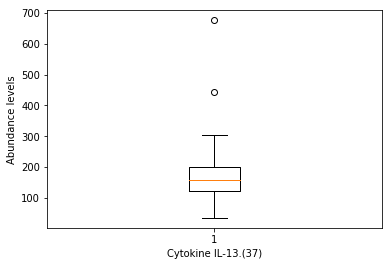

In [52]:
# Plot cytokines and virulence

import matplotlib.pyplot as plt

%matplotlib inline
plt.boxplot(cytokines.loc[:,"IL-13.(37)"]);
plt.xlabel("Cytokine IL-13.(37)")
plt.ylabel("Abundance levels")

Text(0.5,1,'Proportion of of presence/absence of "Toxin" biomarkers in 1222 bacterial strains.')

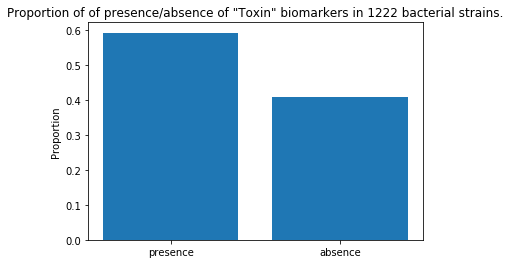

In [53]:
%matplotlib inline
xname = ["presence","absence"]
plt.bar(xname, virulence.Toxin.value_counts()/len(virulence.Toxin));
plt.ylabel("Proportion")
plt.title("Proportion of of presence/absence of \"Toxin\" biomarkers in 1222 bacterial strains.")

Small note: to use matplotlib without printing axes coordinates and save the plots in the notebook: put `%matplotlib inline` at the beginning and `;` at the end!

# Confidence intervals

The aim of this section is to implement confidence intervals for the mean and for proportion using the tools presented in the slides:

* Confidence interval of the mean using Student quantiles
* Confidence interval of the mean using bootstrap
* Confidence interval of a proportion using Gaussian quantiles

1. `cytokines` dataset: compute a confidence interval of the average abundance of cytokin `IL-13.(37)` in WT group

1. `cytokines` dataset: compute a confidence interval of the average abundance of cytokin `IL-13.(37)` in KO group


2. `virulence` dataset: compute a confidence interval of the proportion of strains having the `Toxin` of interest.

Homework:
1. Load the `red_cells.csv` dataset and compute a confidence interval of the average number of red cells in treated condition.

2. Load the `infected_cells.csv` dataset and compute a confidence interval of the proportion of infected cells in WT mice.

(array([2., 0., 1., 1., 1., 0., 2., 2., 1., 5., 0., 2., 2., 2., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 34.49541284,  47.33998106,  60.18454927,  73.02911748,
         85.8736857 ,  98.71825391, 111.56282213, 124.40739034,
        137.25195855, 150.09652677, 162.94109498, 175.78566319,
        188.63023141, 201.47479962, 214.31936783, 227.16393605,
        240.00850426, 252.85307248, 265.69764069, 278.5422089 ,
        291.38677712, 304.23134533, 317.07591354, 329.92048176,
        342.76504997, 355.60961818, 368.4541864 , 381.29875461,
        394.14332283, 406.98789104, 419.83245925, 432.67702747,
        445.52159568, 458.36616389, 471.21073211, 484.05530032,
        496.89986853, 509.74443675, 522.58900496, 535.43357318,
        548.27814139, 561.1227096 , 573.96727782, 586.81184603,
        599.65641424, 612.50098246, 625.34555067, 638.19011888,
      

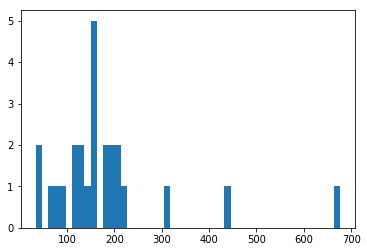

In [54]:
# Check skewness of the data, Gaussian or not
# Hint: using histogram
plt.hist(cytokines.loc[:,"IL-13.(37)"],bins=50)

In [65]:
# Subsample the Cytokines group with only WT:
y = cytokines.loc[cytokines.group == "KO","IL-13.(37)"]

In [66]:
#Transform data to log(1+cytokine level) -> Gaussian or we can use Bootrap
logcyto = np.log(1+y)

(array([1., 0., 0., 0., 1., 1., 4., 1., 0., 1.]),
 array([3.56940347, 3.82245777, 4.07551208, 4.32856638, 4.58162068,
        4.83467498, 5.08772928, 5.34078359, 5.59383789, 5.84689219,
        6.09994649]),
 <a list of 10 Patch objects>)

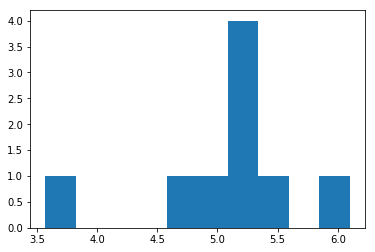

In [67]:
plt.hist(logcyto)

Now calculate CI using t-distribution (in `stats.t`, using function `ppf()`)

In [68]:
n = len(y)
alpha = 0.05
ic_inf = np.mean(logcyto) - stats.t.ppf(1-alpha/2,n-1)*np.std(logcyto)/np.sqrt(n)
ic_sup = np.mean(logcyto) + stats.t.ppf(1-alpha/2,n-1)*np.std(logcyto)/np.sqrt(n)
print('a CI of the log-mean is [',ic_inf,';',ic_sup,']\n')
ic_inf_2 = np.exp(ic_inf) - 1
ic_sup_2 = np.exp(ic_sup) - 1
print('a CI of the mean is [',ic_inf_2,';',ic_sup_2,']\n')


a CI of the log-mean is [ 4.586182731610204 ; 5.572455890815883 ]

a CI of the mean is [ 97.11916718255253 ; 262.0794008051317 ]



Here is the Boottrap function that is written for you, let's spend sometimes analyzing it!

In [69]:
###Bootrap:
def bootIC(x,B):
  """
  x is the vector of observation
  B is no. of bootrap replicates 
  """
  bootmean = []
  for b in range(B-1):
    newobs = np.random.choice(y, len(y), replace=True,p=None)
    bootmean.append(np.mean(newobs))
  ic_inf = np.quantile(bootmean, alpha/2)
  ic_sup = np.quantile(bootmean, 1-alpha/2)
  return(list([bootmean,ic_inf,ic_sup]))


a CI of the mean using bootrap is [ 128.24185910956348 ; 264.7909920738937 ]



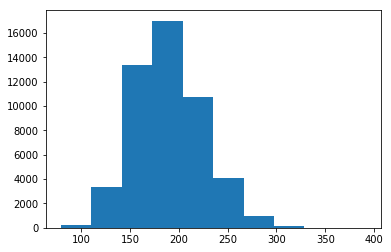

In [70]:
B=50000
bootmean = bootIC(y, B)[0]
plt.hist(bootmean)
len(bootmean)
ic_inf = np.quantile(bootmean,alpha/2)
ic_sup = np.quantile(bootmean,1-alpha/2)
print('a CI of the mean using bootrap is [',ic_inf,';',ic_sup,']\n')

In [72]:
import scipy.stats as stats
stats.normaltest(logcyto)

/Users/caotranbichngoc/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=6.51092987271088, pvalue=0.03856288720650598)

What do you see from Bootstrapping result compare to student t-distribution?

# Hypothesis testing



I found blog posts are very efficient to grasp some basics of anything. [Towardsdatasciece](https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f) is a good one, here is a reference for **t-test** for example. Let's revise!

The aim of this section is to practice hypothesis testing using t-test for mean comparison (as seen on the slides) but also to discover 2 other tests:

* `stats.fisher_exact()` for association/independence testing in contingency tables
* (`stats.ttest_ind()` for mean comparison for large samples and/or Gaussian biomarkers)
* `stats.wilcoxon()` for "mean" comparison for small samples and/or non Gaussian biomarkers

Fisher exact test you have encountered in "Lady tasting tea", t-test you might have seen in you biostat course (or you might want to look at a simple explaination [here](), and wilcoxin test is a non-parametric test.



1. `cytokines` dataset: compare the average abundance of cytokin `IL.13..37.` across the 2 experimental groups.

Hint: comparing results with t-test and wilcoxon test for this question, which test is better?

- Make sure you read this official document about ttest for 2 independent samples: [readthedocs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)

In [73]:
df = cytokines.loc[:,["group","IL-13.(37)"]]

In [79]:
df["logcyto"] = np.log(1+ df.loc[:,"IL-13.(37)"])

In [81]:
from scipy.stats import ttest_ind

In [84]:
ttest_ind(df.loc[df.group == "WT", "logcyto"],df.loc[df.group == "KO", "logcyto"])

Ttest_indResult(statistic=-0.33178901263153415, pvalue=0.7430530520831482)

In [91]:
stats.mannwhitneyu(df.loc[df.group == "WT", "IL-13.(37)"] , df.loc[df.group == "KO", "IL-13.(37)"])

MannwhitneyuResult(statistic=54.0, pvalue=0.16090568959907525)

2.  `virulence` dataset: Test for independence between the two markers `hlyA` and `Toxin`.



In [115]:
virulence.Toxin.value_counts()

1    723
0    499
Name: Toxin, dtype: int64

In [101]:
toxin = np.array(virulence.Toxin.value_counts())

In [103]:
hlyA = np.array(virulence.hlyA.value_counts())

In [134]:
contigency = list(zip(hlyA,toxin))
contigency =  pd.DataFrame(contigency,columns=["hlyA","Toxin"],index=[1,0])
contigency

,hlyA,Toxin
1,724,723
0,498,499


In [135]:
fisher = stats.fisher_exact(contigency,alternative="two-sided")
print(fisher)

(1.0033939353541412, 1.0)


In [136]:
# Is the result significant?
alpha = 0.05
if  fisher[1] < alpha:
    print("2 markers differ significantly")
else:
    print("No significant difference in 2 markers found")

No significant difference in 2 markers found


3. `weight` dataset: compare the mean weight of mice between the 2 timepoints. Be careful: measurements are performed on the same mice, meaning that the measures are not independent, they are paired. 



In [137]:
weight.head()

,MouseID,GroupID,Weight
0,1,W01,14.9
1,2,W01,16.3
2,3,W01,16.9
3,4,W01,15.4
4,5,W01,15.1


In [145]:
ttest_pair = stats.ttest_rel(weight.Weight[weight.GroupID == 'W01'],weight.Weight[weight.GroupID == 'W02'])
print(ttest_pair)

Ttest_relResult(statistic=-8.367739487148453, pvalue=6.833595507287468e-05)


In [147]:
# Is the result significant?
alpha = 0.05
if  ttest_pair[1] < alpha:
    print("2 mice have mean weights differ significantly between timepoint 1 and 2")
else:
    print("No significant difference in mean weights of 2 mice between timepoint 1 and 2 found")

2 mice have mean weights differ significantly between timepoint 1 and 2


# Introduction to multiple testing



Load the `MFI_controller.csv` dataset. The goal of this exercise is to scan the 89 markers (measured through MFI) and find the ones with mean MFI significantly different between the two types of patients. 

1. Perform a t-test for each marker, comparing controller and healthy patients. 

2. Retrieve the p-values of each test and using `p.adjust()` function, adjust the p-values to multiple comparisons with Benjamini-Hochberg and Bonferroni methods. 




In [148]:
MFI_controller.head()

,MFI_1,MFI_2,MFI_3,MFI_4,MFI_5,MFI_6,MFI_7,MFI_8,MFI_9,MFI_10,...,MFI_80,MFI_81,MFI_82,MFI_83,MFI_84,MFI_85,MFI_86,MFI_87,MFI_88,Group
2922,11427.938291,1258.869647,124.329243,719.621598,5275.64751,3394.039524,1507.009929,945.622501,1942.428797,3201.850659,...,1965.090943,327.805889,920.322109,4933.554846,19419.381231,6838.702587,1582.056786,2745.801343,641.201273,Healthy
2926,11907.000000,821.000000,440.000000,455.000000,5118.00000,3168.000000,995.000000,718.000000,1670.000000,3507.000000,...,1875.000000,580.000000,993.000000,5459.000000,19638.000000,7586.000000,1273.000000,3160.000000,413.000000,Controller
2969,25702.000000,1436.000000,531.000000,1399.000000,1708.00000,827.000000,153.000000,190.000000,3144.000000,3748.000000,...,2135.000000,755.000000,543.000000,5012.000000,19157.000000,4677.000000,1008.000000,2955.000000,533.000000,Controller
2972,25222.938291,1873.869647,33.329243,1663.621598,1865.64751,1053.039524,665.009929,417.622501,3416.428797,3442.850659,...,2225.090943,502.805889,470.322109,4486.554846,18938.381231,3929.702587,1317.056786,2540.801343,761.201273,Healthy
3866,29617.000000,3057.000000,679.000000,786.000000,5279.00000,2388.000000,383.000000,69.500000,2794.000000,3674.000000,...,2674.000000,1077.000000,775.000000,3633.000000,20941.000000,2607.000000,1134.000000,905.000000,207.000000,Controller


In [166]:
group1, group2 = [g[1].MFI_1 for g in MFI_controller.groupby('Group')]

group2

2922    11427.938291
2972    25222.938291
3870    29137.938291
3876    28269.938291
3880    19684.938291
            ...     
4395    16152.938291
4401     1740.938291
4404    21209.938291
4412    16298.938291
4424    13487.938291
Name: MFI_1, Length: 82, dtype: float64

In [171]:
MFI_controller.Group.value_counts()

Controller    82
Healthy       82
Name: Group, dtype: int64

In [ ]:
# Checking!

In [173]:
MFI_controller.loc[MFI_controller.Group == "Healthy","MFI_1"]

2922    11427.938291
2972    25222.938291
3870    29137.938291
3876    28269.938291
3880    19684.938291
            ...     
4395    16152.938291
4401     1740.938291
4404    21209.938291
4412    16298.938291
4424    13487.938291
Name: MFI_1, Length: 82, dtype: float64

In [183]:
pval_list = []
for i in range(MFI_controller.shape[1] - 2):
    group1, group2 = [g[1].iloc[:,i] for g in MFI_controller.groupby('Group')]
    pval_list.append(stats.ttest_ind(group1,group2)[1])
print(pval_list)

[0.6548068900335808, 0.0023932277328664086, 2.3323392952586793e-17, 2.4128387985724555e-05, 0.6692755137681297, 0.08434940014323464, 1.2356490315097114e-12, 6.909939937482145e-06, 0.09418678199391012, 0.09211783263288117, 0.8834370486545756, 0.0066098688021459795, 1.2057576740488417e-07, 0.002885939933010691, 0.7473302588977602, 0.9844196297833256, 0.796793824428137, 0.46461134813021876, 0.41291222940313044, 0.019863092436761546, 0.6483774217781524, 2.168219242771713e-06, 0.10808379477523532, 0.7999022095289661, 0.8804982783694006, 5.737945291509975e-176, 0.23444031358282777, 0.35633625239192923, 5.043252636300529e-109, 0.21324495846501837, 0.8319499027236916, 0.5168388377733948, 3.863341487920865e-10, 0.42005089375786964, 1.9118595713774348e-17, 0.9655588500354837, 0.36053107850142196, 0.9973978714936079, 0.6666682961570773, 9.637243590589999e-05, 0.02010961697310624, 0.0002994366182271938, 0.6433996740330832, 0.11819930263876106, 0.4485525354510488, 0.004989528745087481, 1.4661150738

(array([45.,  3.,  4.,  7.,  6.,  5.,  7.,  3.,  4.,  3.]),
 array([5.73794529e-176, 9.97397871e-002, 1.99479574e-001, 2.99219361e-001,
        3.98959149e-001, 4.98698936e-001, 5.98438723e-001, 6.98178510e-001,
        7.97918297e-001, 8.97658084e-001, 9.97397871e-001]),
 <a list of 10 Patch objects>)

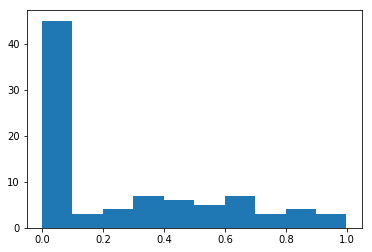

In [184]:
plt.hist(pval_list)

Using multitest.multipletest() in statsmodels.stats to correct p-values with Bonferroni method

Read the docs: [multipletests](https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html)

In [204]:
from statsmodels.stats import multitest
p_adj = multitest.multipletests(pval_list, method= "bonferroni")
p_adj = [ a  for a in p_adj[1] if a <= 0.05]

In [205]:
print(p_adj)

[2.029135186875051e-15, 0.002099169754758036, 1.075014657413449e-10, 0.0006011647745609466, 1.0490091764224923e-05, 0.00018863507412113904, 4.992012403613678e-174, 4.38762979358146e-107, 3.3611070944911527e-08, 1.6633178270983682e-15, 0.0083844019238133, 0.02605098578576586, 0.0012755201142114116, 0.00010343617702672336, 1.2459051321307487e-12, 5.312469091637818e-09, 0.02772364680430359, 3.0778218746706617e-41, 1.549269463887499e-45, 1.2353213513904603e-88, 0.0012060840215412, 0.0021221991932744806, 7.904251350506606e-05, 7.170846404469604e-82, 4.1687954719099325e-09, 5.264198423111886e-10, 0.011413780404271118]


# Problem set 2: 

Thank you for going this far, we assume you will come back to this project once you finish Pack 2: Scikit-learn.
In this problem set, we expect you to perform a real analysis on real data. Please send us your answer before 15th of September. We will send you the correct answer as soon as you provide us your submission. It is a real challenge! Bonne chance! :)

 <img src="fig/study_outline.png" width=400>

The objective of this project is to establish the boundaries of a "healthy" immune response, assess how this variation is genetically, epigenetically or environmentally controlled, and understand how this variation may account for differences in susceptibility to infection, therapeutic treatment or vaccine response.

To assay inter-individual variability of immune responses, TruCulture whole-blood assay devices have been developed to test the effects of various immune stimulation conditions (Escherichia coli, BCG, Staphylococcus aureus, SEB, Candida albicans and Influenza virus) on individal immune responses. Transcriptome data quantifying expression of 560 genes under these stimulation conditions were produced through hybridization arrays (Nanostring) for the individuals of the cohort (Piasecka et al., 2018).

Immune responses are triggered through the activation of specialised immune cell populations and immune cell composition varies with age and sex. This may for example explain the observed reduced vaccination efficacy in the elderly. Major immune cell populations in the circulation of healthy donors have been quantified with median fluorescent intensity (MFI) assessed by flow cytometry for the donors of the cohort (Piasecka et al., 2018).
One of the main objectives of this project is to relate the table of genes expression to phenotypic markers such as age, gender, life habits and the immune response phenotypes.


Reference:

Piasecka, E. et al. Natural variation in the parameters of innate immune cells is preferentially driven by genetic factors resource. Nat. Immunol. 19, 302-314 (2018).

Piasecka, B. et al. Distinctive roles of age, sex, and genetics in shaping transcriptional variation of human immune responses to microbial challenges. Proc. Natl. Acad. Sci. 115, E488-E497 (2018)

Two txt files have been provided to you for this project. The first one, `eCRF.txt` should have `eCRF.shape[0]` rows, `eCRF.shape[1]` columns and contains phenotypic information about `eCRF.shape[0]` healthy patients such as their age, gender, smoking habits, BMI... All subjects are identified by an unique identifier in column `SUBJID`.
The second dataset in file `nanostring.txt` contains measures of genes expression for all individuals and 7 bacterial stimuli. Stimulus information is available in column `Stimulus.Name` and patient identifier in column `SUBJID` to allow the match between phenotypic information and gene expression. Note that gene expression has already been normalized, meaning that gene variables do not require any extra transformation. 



### Question 0: Before applying advanced statistical tools, take time to describe, summarize and visualize the data. For example, make barplots, boxplots, compute summaries of the data (mean, variance, proportion) in order to get familiar with the format of the dataset. More generally, all along the project, when a new marker or a new variable is studied, take time to shortly describe it.

In [207]:
import pandas as pd  

In [208]:
eCRF = pd.read_csv("data/set2/eCRF.txt",delimiter="\t") 

In [209]:
eCRF.shape[0]

816

In [210]:
eCRF.head()

,Age,OwnsHouse,PhysicalActivity,Sex,LivesWithPartner,LivesWithKids,BornInCity,BMI,CMVPositiveSerology,MetabolicScore,...,VaccineWhoopingCough,VaccineYellowFever,VaccineHepB,VaccineFlu,SUBJID,DepressionScore,HeartRate,Temperature,HourOfSampling,DayOfSampling
0,22.33,Yes,3.0,Female,No,No,Yes,20.13,No,0,...,Yes,No,Yes,No,2,0.0,66,36.8,8.883,40
1,28.83,Yes,0.0,Female,Yes,No,Yes,21.33,Yes,1,...,Yes,No,Yes,No,3,0.0,66,37.4,9.350,40
2,23.67,Yes,0.0,Female,Yes,No,Yes,22.18,No,2,...,No,No,Yes,No,4,0.0,62,36.9,8.667,40
3,21.17,No,0.5,Female,No,No,No,18.68,No,0,...,No,No,Yes,No,5,1.0,64,36.0,9.883,40
4,26.17,Yes,1.5,Female,No,No,Yes,29.01,No,1,...,Yes,No,Yes,No,8,0.0,67,36.7,8.550,81


In [211]:
nanostring = pd.read_csv("data/set2/nanostring.txt",delimiter="\t") 

In [240]:
nanostring.head()

,SUBJID,Stimulus.Name,ABCB1,ABCF1,ABL1,ADA,AHR,AICDA,AIRE,ALAS1,...,TRAF6,TYK2,UBE2L3,VTN,XBP1,XCL1,XCR1,ZAP70,ZBTB16,ZEB1
0,2,BCG,7.554459,9.219946,7.514606,8.353650,8.850751,4.345700,4.325194,8.247999,...,7.717017,8.286764,7.502632,4.231431,10.357064,4.874329,4.422277,9.212120,7.631819,9.283739
1,2,C.albicans,7.150648,8.621474,7.039367,6.137992,9.083866,5.516857,3.916763,7.996525,...,7.540214,7.413515,7.265183,4.118751,9.591399,4.661937,3.641928,8.658329,7.102924,8.880914
2,2,E.coli,7.735487,8.958082,7.505286,7.478745,9.038046,4.106642,4.445018,8.045067,...,8.183378,7.865317,7.617842,3.439714,10.408763,4.839841,5.751282,8.987657,7.332786,9.042492
3,2,Influenza,7.661653,8.287930,6.281927,6.019046,9.089454,2.403826,4.984143,8.069580,...,7.836040,7.422128,7.049543,4.354611,8.948858,5.905329,4.293494,8.485333,7.248792,8.014676
4,2,Null,7.646707,7.614003,6.960148,5.661178,8.943238,3.957709,3.405641,7.557269,...,7.835371,8.330710,7.092763,4.829530,8.351957,4.290509,4.452900,9.139734,7.618323,8.366321


Index(['Age', 'OwnsHouse', 'PhysicalActivity', 'Sex', 'LivesWithPartner',
       'LivesWithKids', 'BornInCity', 'BMI', 'CMVPositiveSerology',
       'MetabolicScore', 'LowAppetite', 'TroubleConcentrating', 'HoursOfSleep',
       'Listless', 'UsesCannabis', 'RecentPersonalCrisis', 'Smoking',
       'Employed', 'Education', 'DustExposure', 'Income', 'HadMeasles',
       'HadRubella', 'HadChickenPox', 'HadMumps', 'HadTonsillectomy',
       'HadAppendicectomy', 'VaccineHepA', 'VaccineMMR', 'VaccineTyphoid',
       'VaccineWhoopingCough', 'VaccineYellowFever', 'VaccineHepB',
       'VaccineFlu', 'SUBJID', 'DepressionScore', 'HeartRate', 'Temperature',
       'HourOfSampling', 'DayOfSampling'],
      dtype='object')
Female    417
Male      399
Name: Sex, dtype: int64


Text(0,0.5,'Expression of patient 2')

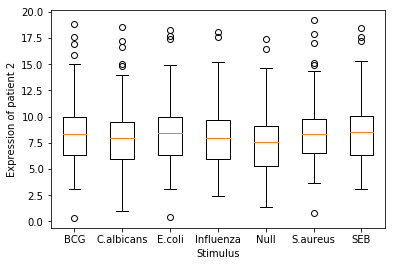

In [246]:
#Factors consider phenotype of patients:
print(eCRF.columns)

#Description of the phenotype: Age of patients is from 20 to 70, even distributed sex: female 417, male 399

eCRF.describe()
print(eCRF.Sex.value_counts())
### Visualization

#Box plot for Patient 2 expression level responding to different stimulus
sub2 = nanostring.loc[nanostring.SUBJID == 2,]
sub2.index = sub2.iloc[:,1]
sub2 = sub2.iloc[:,2:]
%matplotlib inline
plt.boxplot(sub2,labels=sub2.index);
plt.xlabel("Stimulus")
plt.ylabel("Expression of patient 2")

## Exploratory analysis of the stimulus effect
In this section, we are going to explore the structure of the dataset across genes and stimulations.



### Question 1: Perform a Principal Components Analysis on the whole dataset using the genes as variables, compute at least 30 principal components. Color the dots by stimulus in the spaces spanned by the first four dimensions. Interpret.

### Question 2: Extract the three genes that are the most associated with PC1 and PC2. Interpret.

### Question 3: Perform a UMAP analysis on the whole dataset, indicate the number of nearest neighbors that was used. Plot the first two UMAP dimensions and color the dots by stimulus. Interpret.

### Question 4: Perform a k-means clustering of the samples using seven clusters.

### Question 5: Perform a k-means clustering of the samples using seven clusters, in the space spanned by the principal components carrying at least 80% of the total variance.

### Question 6: Perform the same clustering in the space defined spanned by the first two UMAP dimensions.

### Question 7: Analyze the clustering results. Which method would you recommend to cluster samples in order to recover the stimulus annotation?


Exploratory analysis within non stimulated samples
We are going to perform an exploratory analysis of the non stimulated samples. This can be useful to better understand which variables (e.g. batches, ethnicity, sex, age, serology, …) are associated with gene expression variations and should likely be investigated and controlled for in subsequent analyses.

### Question 8: Compute a PCA of the non stimulated samples. Investigate/plot the distribution of the samples on the first six PCs with respect to phenotypes. Suggest a set of phenotypes that might be influencing the gene expression.

### Question 9: Using all genes, cluster the non stimulated samples using the method of your choice. 

# Homework

Differential analysis
The objective of this section is to perform a differential analysis to detect genes that are differentially expressed between the classes of BMI.



### Question 10: Check that each patient has the same number of stimulus in the expression data.

### Question 11: Select rows from the expression data corresponding to the “E.coli” stimulus and create a new data.frame containing patients present in both expression and clinical data. Make sure patients are similarly ordered in the two tables newly created.

### Question 12: Create a new variable in the clinical data.frame to categorize the BMI into three classes: low (<21), medium (>21 and <25) and high (>25). How many patients are there in each class?

### Question 13: Test for every gene of the expression dataset and save the p-value of each gene in a numeric vector as long as the number of genes tested. Draw a histogram of these p-values. How many genes have a p-value lower than 5%?

### Question 14: Adjust these p-values using the Benjamini-Hochberg method and draw their histogram. How many genes are differentially expressed between the BMI classes (at a 5% threshold)?


### Question 15: Which are the 6 most significant genes? Illustrate the gene expression differences with boxplots and scatter plots 